In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import folium
from sqlalchemy import create_engine, MetaData, Table
from eralchemy import render_er

%matplotlib inline

In [76]:
# Use read_csv to import building permits csv that was downloaded from data.nashville.gov into a dataframe

permits = pd.read_csv('data/Building_Permits_Issued.csv', low_memory=False)

In [77]:
# How many rows/columns in the dataframe

permits.shape

(34474, 20)

In [35]:
# Show the first 5 rows

permits.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,S SIDE MAPLEWOOD LANE & W OF HUTSON AVE,CONTRERAS DESIGN BUILD LLC,CADM,CAZ01A001,3728422,to demolish existing residence and detached st...,8.0,37011002.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228..."
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,02/25/2019,07/22/2019,0.0,812 BRIAR CIR,MADISON,TN,37115,COMMON AREA HOMES AT BRIAR,COLE INVESTMENTS LLC,CAUO,CAA03R301,3611315,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,37010802.0,"812 BRIAR CIR\nMADISON, TN 37115"
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,02/27/2019,07/22/2019,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,W/S HILLSBORO PK. & N/S ABBOTT MARTIN RD.,"BATTINO CONTRACTING SOLUTIONS, LLC",CACR,CAF19A203,3613106,2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,37017901.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372..."
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,07/03/2019,07/22/2019,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,LOT 408 THE RESERVE AT STONE HALL PH 2 SEC 1,MERITAGE HOMES OF TENNESSEE INC,CARN,CAA01R301,3687554,New Single Family construction - Total Sq foot...,14.0,37015402.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076"
4,2017000049,Building Residential - New,Single Family Residence,164100A43100CO,01/03/2017,01/09/2017,268107.0,704 ABERCORN CT,ANTIOCH,TN,37013,LOT 79 SUMMERFIELD SUBDIVISION VILLAGE TEN,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,3306701,TO CONSTRUCT A NEW SINGLE FAMILY RES AT 2380 S...,32.0,37015630.0,"704 ABERCORN CT\nANTIOCH, TN 37013\n(36.045042..."


In [36]:
# Show the last 7 rows

permits.tail(7)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
34467,2017062064,Building Residential - Addition,Single Family Residence,07209025900,09/25/2017,09/25/2017,57452.0,1001 FAIRWIN AVE,NASHVILLE,TN,37216,LOT 21 ESKRIDGE SUB,DOTSON GROUP LLC,CARA,CAA01R301,3408732,to construct 510SF addition to the rear of exi...,5.0,37011400.0,"1001 FAIRWIN AVE\nNASHVILLE, TN 37216\n(36.199..."
34468,2017080442,Building Residential - Addition,Single Family Residence,13004005000,12/18/2017,01/08/2018,300000.0,4215 SNEED RD,NASHVILLE,TN,37215,PT LOT 4 BELLEMEADE ANNEX,VAN MOL RESTORATION LLC,CARA,CAA01R301,3433097,Remodel Kitchen. Open back wall of home to add...,34.0,37017902.0,"4215 SNEED RD\nNASHVILLE, TN 37215\n(36.100397..."
34469,2018065491,Building Residential - Addition,Single Family Residence,08307030200,10/16/2018,10/30/2018,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,37206,PT LOT 2 ROLLING ACRES,"ALFORD BUILDERS, LLC",CARA,CAA01R301,3569305,to construct 2 story addition which will add 1...,6.0,37012100.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18..."
34470,2017019524,Building Residential - Addition,Single Family Residence,04313027400,03/22/2017,03/22/2017,20000.0,316 CHERRY ST,MADISON,TN,37115,LOT 25 BLK C CRITTENDEN EST,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARA,CAA01R301,3338760,EXISTING ONE STORY HOUSE.\nTHIS PERMIT:\n1...N...,9.0,37010701.0,"316 CHERRY ST\nMADISON, TN 37115\n(36.258694, ..."
34471,2018008218,Building Commercial - Rehab,"General Office, Professional Services",03409008400,02/13/2018,04/17/2018,14000.0,131 EDENWOLD RD,MADISON,TN,37115,LOTS 18 19 PT 20 BLK A EDENWOLD CITY SUB,sergy motorny,CACR,CAD02B016,3446279,BUILDING AT 2100 SQFT WITH UNFINISH ATTIC AT A...,10.0,37010401.0,"131 EDENWOLD RD\nMADISON, TN 37115\n(36.287001..."
34472,2017044878,Building Sign Permit,Sign - Ground / Wall Signs,09306208500,07/10/2017,08/23/2017,5000.0,110 2ND AVE N,NASHVILLE,TN,37201,PT LOT 15 ORIGINAL TOWN OF NASHVILLE,GENERAL SIGN SERVICES,CASN,CAZ02A001,3384196,to erect 28SF illuminated wall sign for Famous...,19.0,37019500.0,"110 2ND AVE N\nNASHVILLE, TN 37201\n(36.162296..."
34473,2018059022,Building Residential - New,Single Family Residence,163020C32000CO,09/17/2018,09/26/2018,140813.0,1382 RURAL HILL RD 320,ANTIOCH,TN,37013,UNIT 320 AUTUMN RIDGE TOWNHOMES 3RD AMEND,R J YORK HOMES LLC,CARN,CAA01R301,3560019,TO CONSTRUCT A NEW SINGLE FAMILY UNIT AT 1250 ...,32.0,37015628.0,"1382 RURAL HILL RD 320\nANTIOCH, TN 37013\n(36..."


In [37]:
permits = permits[['Permit #', 'Permit Type Description', 'Permit Subtype Description',
       'Parcel', 'Date Entered', 'Date Issued', 'Construction Cost', 'Address',
       'City', 'State', 'ZIP', 'Contact', 'Purpose', 'Council District']]

In [38]:
# What are the column names?

permits.columns

Index(['Permit #', 'Permit Type Description', 'Permit Subtype Description',
       'Parcel', 'Date Entered', 'Date Issued', 'Construction Cost', 'Address',
       'City', 'State', 'ZIP', 'Contact', 'Purpose', 'Council District'],
      dtype='object')

In [39]:
# Change column names to: 'number', 'type_desc', 'subtype_desc', 'parcel', 'enter_date', 'issue_date', 'cost', 'address', 'city', 
#                         'state', 'zip', 'subdivision', 'contact', 'type_code', 'subtype_code', 'tracking_number', 'purpose', 'council_district',
#                         'census_tract', 'mapped_location'

permits.columns = ['number', 'type_desc', 'subtype_desc', 'parcel', 'enter_date', 'issue_date', 'cost', 'address', 'city', 
                   'state', 'zip', 'contact', 'purpose', 'council_district']

In [40]:
# Which column has the most number of null values? How many?

permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34474 entries, 0 to 34473
Data columns (total 14 columns):
number              34474 non-null object
type_desc           34474 non-null object
subtype_desc        34474 non-null object
parcel              34474 non-null object
enter_date          34474 non-null object
issue_date          34474 non-null object
cost                34458 non-null float64
address             34474 non-null object
city                34472 non-null object
state               34472 non-null object
zip                 34474 non-null int64
contact             34473 non-null object
purpose             34019 non-null object
council_district    34422 non-null float64
dtypes: float64(2), int64(1), object(11)
memory usage: 3.7+ MB


In [41]:
# Which person or group had the most permits (exclude self contractors)?

permits['contact'].value_counts()

SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INFORMATION)    3061
SELF CONTRACTOR COMMERCIAL (SEE APPLICANT INFORMATION)      746
OLE SOUTH PROPERTIES INC                                    601
NVR, INC. T/A RYAN HOMES                                    581
JOSLIN SIGN & MAINTENANCE CO INC                            520
                                                           ... 
NEX-GEN CONSTRUCTION, LLC                                     1
melissa bond                                                  1
WARREN, JAMES R CONTRACTOR                                    1
MUTTS AND MEOWS                                               1
BROOME, THOMAS C.                                             1
Name: contact, Length: 4555, dtype: int64

In [42]:
# Were there more permits were for residential or commercial use?
# How many of each?
# Were there any permits that were not labeled for residential or commercial use?
# How many?

permits_type_vc = permits['type_desc'].value_counts()
permits_type_counts = permits_type_vc.reset_index(drop=False)
permits_type_counts.columns = ['type', 'count']
residential = permits_type_counts[permits_type_counts['type'].str.contains('Residential')]
commercial = permits_type_counts[permits_type_counts['type'].str.contains('Commercial')]
print('More residential than commercial? ', sum(residential['count']) > sum(commercial['count']))
print('Count residential: ', sum(residential['count']))
print('Count commercial: ', sum(commercial['count']))
non_res_comm = permits_type_counts.drop(residential.index).drop(commercial.index)
print('Any non-residential, non-commercial? ', len(non_res_comm)>0)
print('Count: ', sum(non_res_comm['count']))

More residential than commercial?  True
Count residential:  20396
Count commercial:  6574
Any non-residential, non-commercial?  True
Count:  7504


In [43]:
# What was the lowest cost permit? What was the greatest cost? Make a histogram of costs. What does the distribution show?

sort_cost = permits['cost'].value_counts().sort_index()
print('Lowest cost: ', sort_cost.head(1).index[0])
print('Highest cost: ', sort_cost.tail(1).index[0])

Lowest cost:  0.0
Highest cost:  131412660.0


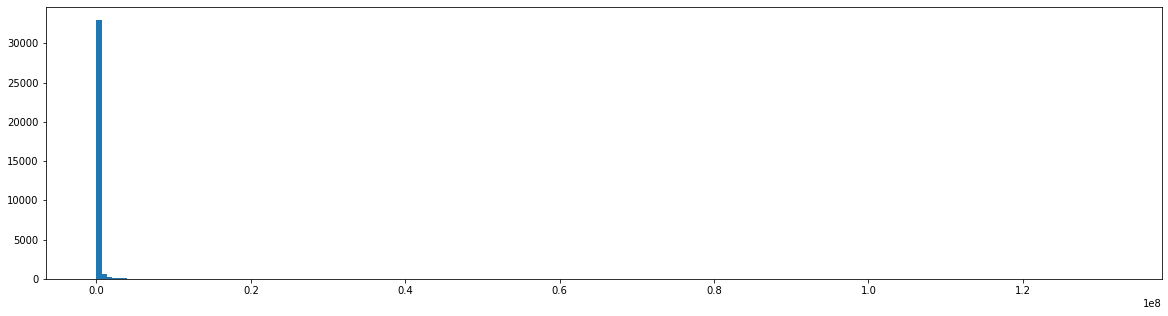

In [44]:
plt.figure(figsize = (20, 5))
plt.hist(permits['cost'], bins = 200);

In [67]:
# What is the longest time a permit took to be issued?

permits['enter_date'] = pd.to_datetime(permits['enter_date'])
permits['issue_date'] = pd.to_datetime(permits['issue_date'])
permits['lapse'] = permits['issue_date']-permits['enter_date']
print(permits['lapse'].sort_values().head(1))
print(permits['lapse'].sort_values().tail(1))

0   0 days
Name: lapse, dtype: timedelta64[ns]
10766   3371 days
Name: lapse, dtype: timedelta64[ns]


In [65]:
# How many took more than 100 days?

sum((permits['lapse'].astype(int)/1E14)>100)

2171

2017    11624
2019    11171
2018    11089
2016      590
Name: issue_year, dtype: int64
max 2017:  2017-12-29 00:00:00
min 2017:  2017-01-03 00:00:00
max 2018:  2018-12-31 00:00:00
min 2018:  2018-01-02 00:00:00
max 2019:  2019-12-12 00:00:00
min 2019:  2019-01-02 00:00:00
Subsetting...
max 2017:  2017-12-12 00:00:00
min 2017:  2017-01-03 00:00:00
max 2018:  2018-12-12 00:00:00
min 2018:  2018-01-02 00:00:00
max 2019:  2019-12-12 00:00:00
min 2019:  2019-01-02 00:00:00


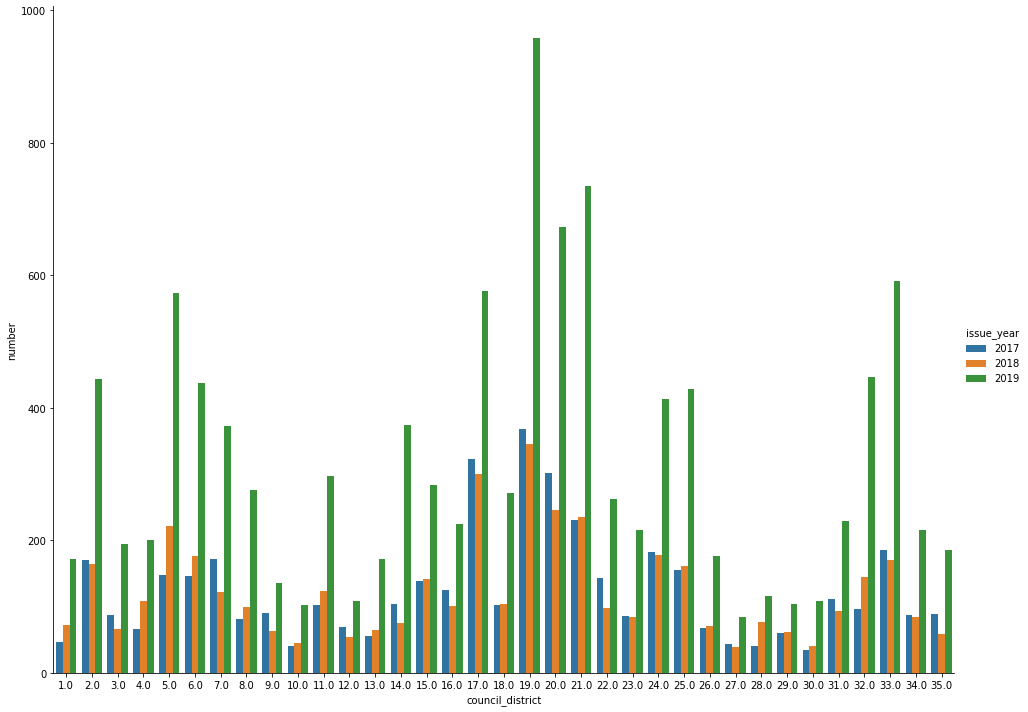

In [15]:
# What years are covered in this data set? 

permits['issue_year'] = permits['issue_date'].dt.year
print(permits['issue_year'].value_counts())

# Drop years that have fewer than 5000 rows. For any years that were dropped, how many rows were in that year?

# 2016 only has 590 rows

# Make subsets for the remaining years

permits_2017 = permits[permits['issue_year']==2017]
permits_2018 = permits[permits['issue_year']==2018]
permits_2019 = permits[permits['issue_year']==2019]

# If any years are missing more than 5 days from the beginning or end of the year,
# truncate the other years so that each year covers the same date range.
# For example, if you have the years 2017, 2018, and 2019,
# but 2019 only has rows through December 12 (the other go through the end of Dec),
# remove rows for December 13-31 from 2017 and 2018

print('max 2017: ', max(permits_2017['issue_date']))
print('min 2017: ', min(permits_2017['issue_date']))
print('max 2018: ', max(permits_2018['issue_date']))
print('min 2018: ', min(permits_2018['issue_date']))
print('max 2019: ', max(permits_2019['issue_date']))
print('min 2019: ', min(permits_2019['issue_date']))

print('Subsetting...')
permits_2017 = permits_2017[(permits_2017['issue_date'].dt.month <= 12) &
                            (permits_2017['issue_date'].dt.day <= 12)]
permits_2018 = permits_2018[(permits_2018['issue_date'].dt.month <= 12) &
                            (permits_2018['issue_date'].dt.day <= 12)]

print('max 2017: ', max(permits_2017['issue_date']))
print('min 2017: ', min(permits_2017['issue_date']))
print('max 2018: ', max(permits_2018['issue_date']))
print('min 2018: ', min(permits_2018['issue_date']))
print('max 2019: ', max(permits_2019['issue_date']))
print('min 2019: ', min(permits_2019['issue_date']))

# Recombine the remaining datasets into one df

permits_compare_year = pd.concat([permits_2017, permits_2018, permits_2019])

# Use groupby to count number of permits in each council district for each year.

permits_count_dist_year = permits_compare_year.groupby(['issue_year', 'council_district']).count().reset_index()[['issue_year', 'council_district', 'number']]

# Use seaborn to make a grouped bar plot to visualize the data

g = sns.catplot(x="council_district",
                y="number",
                hue="issue_year",
                data=permits_count_dist_year,
                kind="bar",
                height=10,
                aspect=1.35)


In [16]:
# Import short term rental permits dataset that was downloaded from data.nashville.gov into dataframe

short_term_permits = pd.read_csv('data/Residential_Short_Term_Rental_Permits.csv')

In [17]:
# Keep columns ['Permit #', 'Applicant', 'Contact', 'Permit Subtype Description',
#               'Permit Status', 'Parcel', 'Date Entered', 'Date Issued',
#               'Expiration Date', 'Address', 'City', 'State', 'ZIP', 'Purpose',
#               'Permit Owner Name', 'Permit Type', 'Council District']

short_term_permits = short_term_permits.iloc[:,[0, 1, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 30, 32]]

# Rename columns to ['id', 'applicant', 'contact', 'subtype_desc',
#                    'status', 'parcel', 'entered', 'issued',
#                    'expiration', 'address', 'city', 'state', 'zip', 'purpose',
#                    'permit_owner_name', 'type', 'council_district']

rename_dict = dict(zip(short_term_permits.columns, ['id', 'applicant', 'contact', 'subtype_desc',
                                                    'status', 'parcel', 'entered', 'issued',
                                                    'expiration', 'address', 'city', 'state', 'zip', 'purpose',
                                                    'permit_owner_name', 'type', 'council_district']))

short_term_permits = short_term_permits.rename(columns = rename_dict)

In [18]:
# Select comparable dates with permits
short_term_permits['issued'] = pd.to_datetime(short_term_permits['issued'])
short_term_permits = short_term_permits[short_term_permits['issued'].dt.date.isin(permits_compare_year['issue_date'].dt.date)]


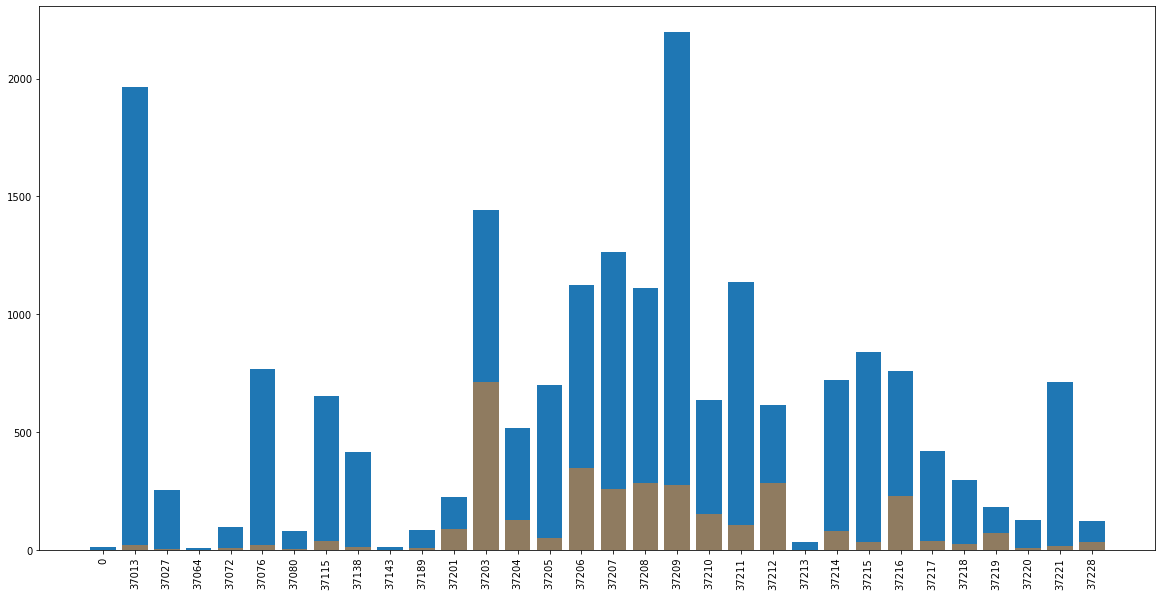

In [19]:
# Compare number of building permits and short term rental permits for each zip code (for a specific comparable year)
# Are the number of building and short term rental permits correlated?
# Are there zip that seem to have a particularly different ratio of building to short term rental permits?
# Can you find any reasons in the data why any differences might have occured?

permits_zip_vc = permits_compare_year['zip'].value_counts().sort_index()
short_term_permits_zip_vc = short_term_permits['zip'].value_counts().sort_index()
permits_merge = pd.merge(permits_zip_vc, short_term_permits_zip_vc, how = 'inner', left_index = True, right_index = True, suffixes = ('_build', '_rent'))

# This isn't a good way to represent the data, probably something similar to the seaborn graph above
plt.figure(figsize = (20, 10))
plt.bar(permits_merge.index.astype('str'), permits_merge['zip_build'])
plt.bar(permits_merge.index.astype('str'), permits_merge['zip_rent'], alpha = 0.5)
plt.xticks(rotation = 90);

In [20]:
# Merge the two data sets on the 'parcel' column.
# How many building permits also had short term rental permits?
# Does one permit usually happen before the other?

parcel_join = pd.merge(permits, short_term_permits, on = 'parcel', how = 'inner')
print('number both building and short term: ', len(parcel_join))
parcel_join['issue_diff'] = parcel_join['issue_date'] - parcel_join['issued']
print('building before: ', sum(parcel_join['issue_diff'].astype(int) > 0))
print('building after: ', sum(parcel_join['issue_diff'].astype(int) < 0))
print('same: ', sum(parcel_join['issue_diff'].astype(int) == 0))



number both building and short term:  2270
building before:  450
building after:  1817
same:  3


In [25]:
# Use folium to make a map of Nashville
nash_map = folium.Map(location=[36.1612, -86.7775], zoom_start=12)
nash_map

In [70]:
# Try out some sql stuff

db = 'data/stations.db'
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)

[('fire_stations',)]


In [73]:
# Use pandas read_sql_query to read in the fire_stations database

fire_stations = pd.read_sql_query('select * from fire_stations', sql.connect('data/stations.db'))

In [74]:
# How many fire stations are in each district?
# Do any districts not have a fire station?
fire_stations.head()

,district,station_number,address,city,state,lat,lng
0,1,Station 30,3705 Old Clarksville Pike,Joelton,TN,36.316384,-86.876877
1,2,Station 24,3851 Clarksville Highway,Nashville,TN,36.203627,-86.840622
2,2,Station 25,2589 Whites Creek Pike,Nashville,TN,36.215851,-86.801616
3,8,Station 1,130 Broadmoor Avenue,Nashville,TN,36.229579,-86.757426
4,8,Station 31,415 Douglas Avenue,Madison,TN,36.259135,-86.716084


In [26]:
# Plot the locations of the fire stations on the map

fire_stations['lat'] = fire_stations['lat'].astype(float)
fire_stations['lng'] = fire_stations['lng'].astype(float)

nash_map = folium.Map(location=[36.1612, -86.7775], zoom_start=12)
for ind, row in fire_stations.iterrows():
    point = [row['lat'], row['lng']]
    folium.Marker(point, popup=row['station_number'], icon=folium.Icon(color='red')).add_to(nash_map)
nash_map

In [27]:
# Someone from the fire department heard about you and wanted you to look at some data from 2018
# and do some analysis on how satisfied residents were with the fire department in each council district.
# They gave you access to a database with some information that you might find useful in your analysis


In [28]:
# Look at the names of the tables in the database

db = 'data/multi_table.db'
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
tables=(mycursor.fetchall())
print(tables)

[('permits_2018',), ('resident_survey_2018',), ('station_dist',), ('strp_2018',)]


In [29]:
# Use sqlalchemy and eralchemy to make an entity relationship diagram (ERD)
# to better understand how the tables in the database are connected to each other

# Start with this
engine = create_engine('sqlite:///data/multi_table.db')
connection = engine.connect()
metadata = MetaData()

# Then import each table into python and save it to a variable using the generalized code below

# <new_variable_name> = Table(<database_table_name_as_str>, metadata, autoload=True, autoload_with=engine)

permits = Table('permits_2018', metadata, autoload=True, autoload_with=engine)
station_dist = Table('station_dist', metadata, autoload=True, autoload_with=engine)
strp = Table('strp_2018', metadata, autoload=True, autoload_with=engine)
survey = Table('resident_survey_2018', metadata, autoload=True, autoload_with=engine)

# Then create an ERD and save it to a file using the render_er function from eralchemy as follows:

filename = 'entity_relationship_diagram.png'
render_er(metadata, filename)

In [30]:
# Once you understand how the data are related, use a combination of SQL and/or python to help the fire department understand how the residents of each council district feel about their performance

fire_council_survey = pd.read_sql_query("SELECT station_dist.district, station_dist.station_number, resident_survey_2018.fire_and_ems__overall, resident_survey_2018.fire_services, resident_survey_2018.fire_response_time, resident_survey_2018.fire_professionalism FROM strp_2018 INNER JOIN resident_survey_2018 ON resident_survey_2018.zip_code = strp_2018.zip LEFT JOIN station_dist ON station_dist.district = strp_2018.council_district", sql.connect('data/multi_table.db'))


In [31]:
# district 32 is being lost, it works with just pandas merges but the sql query seems off, not sure why
fire_council_survey.drop_duplicates('district').sort_values('district')

,district,station_number,fire_and_ems__overall,fire_services,fire_response_time,fire_professionalism
255,1.0,['Station 30'],Satisfied,Satisfied,Satisfied,Satisfied
149,2.0,['Station 24' 'Station 25'],Satisfied,Satisfied,Don't Know,Don't Know
96,3.0,['Station 39'],Very Satisfied,Don't Know,Don't Know,Don't Know
306,4.0,[],Very Satisfied,Satisfied,Satisfied,Satisfied
0,5.0,['Station 3'],Satisfied,Satisfied,Don't Know,Don't Know
23,6.0,['Station 14'],Satisfied,Satisfied,Satisfied,Don't Know
3,7.0,['Station 29' 'Station 18'],Satisfied,Neutral,Satisfied,Very Satisfied
6,8.0,['Station 1' 'Station 31'],Satisfied,Neutral,Satisfied,Very Satisfied
22,9.0,['Station 38'],Satisfied,Satisfied,Neutral,Don't Know
401,10.0,[],Satisfied,Satisfied,Neutral,Don't Know
